In [35]:
library(hexbin)
library(mice)
library(survival)

Load and exmaine the dataset

In [5]:
data(NHANES)
summary(NHANES)

 Cancer.Incidence Cancer.Death      Age              Smoke     
 No :8764         No :9116     Min.   :25.00   Current  :2998  
 Yes: 811         Yes: 459     1st Qu.:35.00   Past     :1279  
                               Median :48.00   Nonsmoker:4213  
                               Mean   :49.41   Unknown  :1085  
                               3rd Qu.:65.00                   
                               Max.   :75.00                   
                                                               
       Ed              Race            Weight            BMI       
 Min.   :0.0000   Min.   :0.0000   Min.   : 32.30   Min.   :13.00  
 1st Qu.:0.0000   1st Qu.:1.0000   1st Qu.: 59.60   1st Qu.:23.10  
 Median :0.0000   Median :1.0000   Median : 69.30   Median :25.60  
 Mean   :0.2121   Mean   :0.8317   Mean   : 71.06   Mean   :25.79  
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.: 80.30   3rd Qu.:27.90  
 Max.   :1.0000   Max.   :1.0000   Max.   :181.40   Max.   :56.60  
            

In [7]:
NHANES

,Cancer.Incidence,Cancer.Death,Age,Smoke,Ed,Race,Weight,BMI,Diet.Iron,Albumin,Serum.Iron,TIBC,Transferin,Hemoglobin,Sex
,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,No,No,46,Nonsmoker,0,0,82.7,29.4,12.5,4.8,NA,NA,NA,14.7,M
2,No,No,72,Unknown,0,0,85.6,29.6,NA,4.1,NA,NA,NA,14.5,M
3,No,No,53,Past,1,1,71.5,23.1,14.8,NA,135,334,40.4,16.8,M
4,No,No,49,Unknown,0,1,93.8,30.0,24.3,4.3,85,385,22.1,16.0,M
5,No,No,31,Current,0,1,81.6,29.7,11.8,4.3,104,436,23.9,16.1,M
6,No,No,42,Current,1,1,68.3,21.9,25.3,4.8,124,285,43.5,17.1,M
7,No,No,27,Current,0,0,67.7,26.3,25.2,4.3,68,468,14.5,14.3,M
8,No,No,64,Unknown,0,0,86.5,31.9,6.8,3.9,NA,NA,NA,15.0,M
9,No,No,37,Nonsmoker,1,0,61.7,20.9,26.2,4.4,69,291,23.7,15.2,M


Get an overview of the missingness pattern

In [9]:
missing_rates = colSums(is.na(NHANES)) / nrow(NHANES)
print(missing_rates)

Cancer.Incidence     Cancer.Death              Age            Smoke 
      0.00000000       0.00000000       0.00000000       0.00000000 
              Ed             Race           Weight              BMI 
      0.00000000       0.00000000       0.00000000       0.61284595 
       Diet.Iron          Albumin       Serum.Iron             TIBC 
      0.01472585       0.02631854       0.10527415       0.08908616 
      Transferin       Hemoglobin              Sex 
      0.10642298       0.07926893       0.00000000 


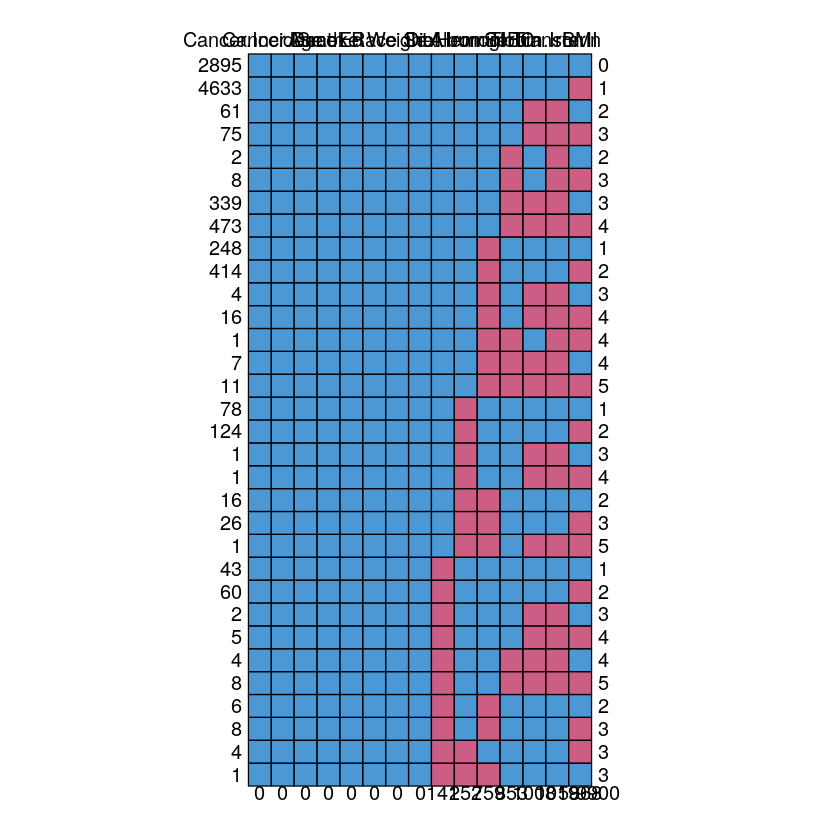

In [11]:
tmp = md.pattern(NHANES)

Perform multiple imputation

In [22]:
num_imputed_datasets = 20
num_entries = nrow(NHANES)
CONTINUOUS_COLS = c('Weight','BMI','Diet.Iron','Albumin','Serum.Iron','TIBC','Transferin','Hemoglobin')

summarize_pooled_results = function(mi_results,
        summary_cols=CONTINUOUS_COLS, mr=missing_rates,
        m=num_imputed_datasets, n=num_entries,
        precision=3) {
    imputed_datasets = complete(mi_results, 'all')

    # Compute the means for each dataset...
    imputed_means = sapply(imputed_datasets, function(dataset) {
        apply(dataset[summary_cols],2,mean)
    })
    
    # ...then combine them...
    grand_means = apply(imputed_means,1,mean)
    
    # ...and compute summary statistics
    
    std_err = sapply(imputed_datasets, function(dataset) {
        apply(dataset[summary_cols],2,sd) / sqrt(n)
    })
    
    within_impute_var = apply(std_err^2,1,mean)
    
    btw_impute_var = rep(NA,length(summary_cols))
    names(btw_impute_var) = names(within_impute_var)

    for (j in 1:nrow(imputed_means)) {
        btw_impute_var[j] = sum((imputed_means[j,] -
            grand_means[j])^2 / (m - 1))
    }

    total_var = within_impute_var + btw_impute_var +
        btw_impute_var / m
    total_std_err = sqrt(total_var)
    
    fmi = (btw_impute_var + btw_impute_var/m) / total_std_err
    
    pooled_stats = round(data.frame(
        mean=grand_means,Vw=within_impute_var,Vb=btw_impute_var,
        SE=total_std_err,Vt=total_var,FMI=fmi,MR=mr[summary_cols]),precision)
    
    return(pooled_stats)
}

In [28]:
default_mi_results = mice(NHANES, m=num_imputed_datasets, maxit=20, seed=664,
    defaultMethod=c('norm.nob','logreg','lda','polr'))


 iter imp variable
  1   1  BMI  Diet.Iron  Albumin  Serum.Iron  TIBC  Transferin  Hemoglobin
  1   2  BMI  Diet.Iron  Albumin  Serum.Iron  TIBC  Transferin  Hemoglobin
  1   3  BMI  Diet.Iron  Albumin  Serum.Iron  TIBC  Transferin  Hemoglobin
  1   4  BMI  Diet.Iron  Albumin  Serum.Iron  TIBC  Transferin  Hemoglobin
  1   5  BMI  Diet.Iron  Albumin  Serum.Iron  TIBC  Transferin  Hemoglobin
  1   6  BMI  Diet.Iron  Albumin  Serum.Iron  TIBC  Transferin  Hemoglobin
  1   7  BMI  Diet.Iron  Albumin  Serum.Iron  TIBC  Transferin  Hemoglobin
  1   8  BMI  Diet.Iron  Albumin  Serum.Iron  TIBC  Transferin  Hemoglobin
  1   9  BMI  Diet.Iron  Albumin  Serum.Iron  TIBC  Transferin  Hemoglobin
  1   10  BMI  Diet.Iron  Albumin  Serum.Iron  TIBC  Transferin  Hemoglobin
  1   11  BMI  Diet.Iron  Albumin  Serum.Iron  TIBC  Transferin  Hemoglobin
  1   12  BMI  Diet.Iron  Albumin  Serum.Iron  TIBC  Transferin  Hemoglobin
  1   13  BMI  Diet.Iron  Albumin  Serum.Iron  TIBC  Transferin  Hemoglobin
 

Warning message:
“Number of logged events: 400”


In [29]:
summarize_pooled_results(default_mi_results, precision=5)

,mean,Vw,Vb,SE,Vt,FMI,MR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Weight,71.05597,0.02561,0.00000,0.16002,0.02561,0.00000,0.00000
BMI,23.94394,0.00225,0.00029,0.05046,0.00255,0.00595,0.61285
Diet.Iron,11.46540,0.00394,0.00006,0.06328,0.00400,0.00098,0.01473
Albumin,4.36952,0.00001,0.00000,0.00333,0.00001,0.00004,0.02632
Serum.Iron,101.37598,0.14156,0.01204,0.39269,0.15420,0.03219,0.10527
TIBC,362.44995,0.36453,0.02449,0.62469,0.39024,0.04116,0.08909
Transferin,28.63478,0.01295,0.00085,0.11765,0.01384,0.00756,0.10642
Hemoglobin,14.43321,0.00023,0.00001,0.01552,0.00024,0.00043,0.07927


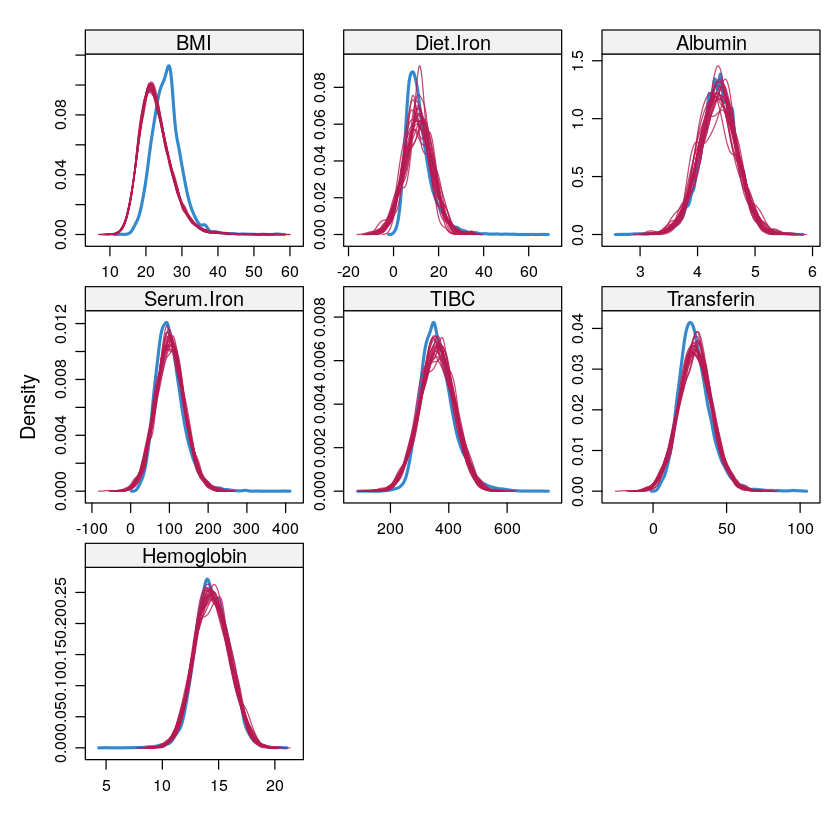

In [30]:
densityplot(default_mi_results)

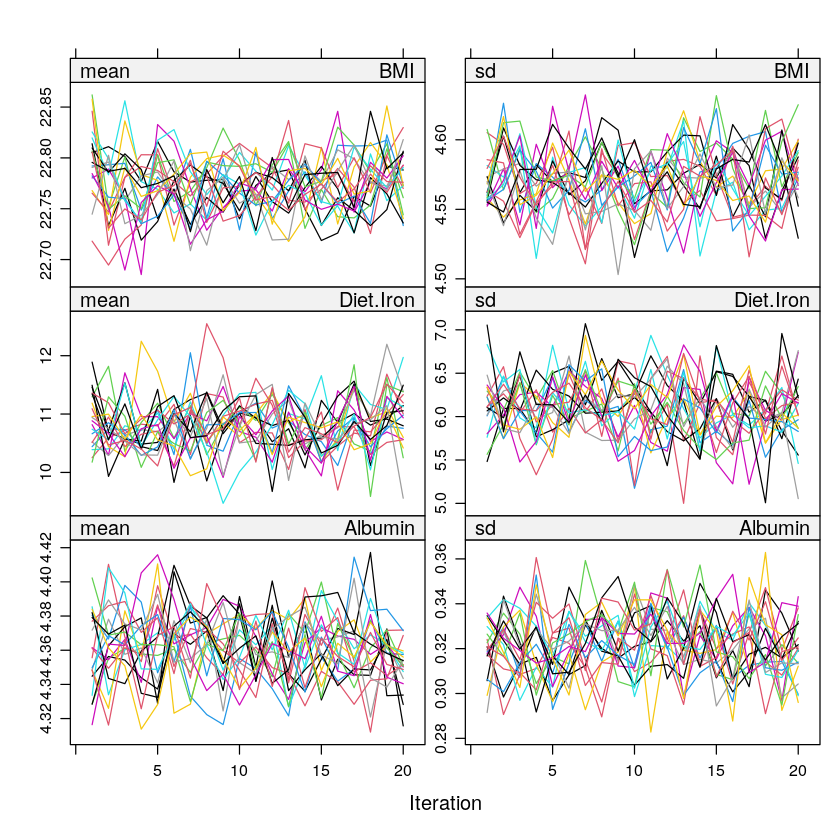

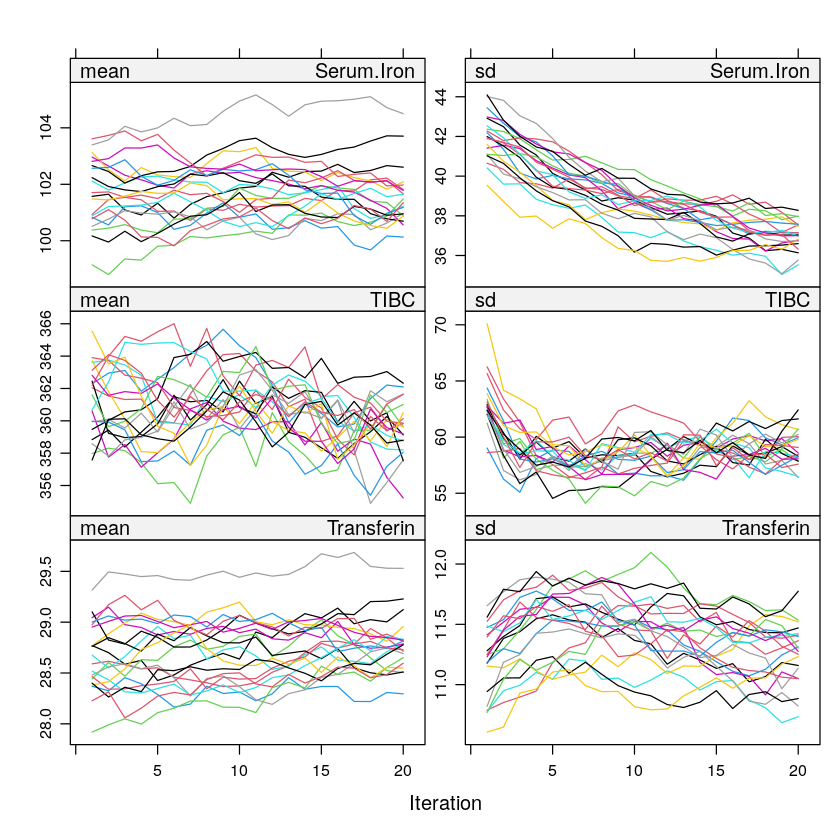

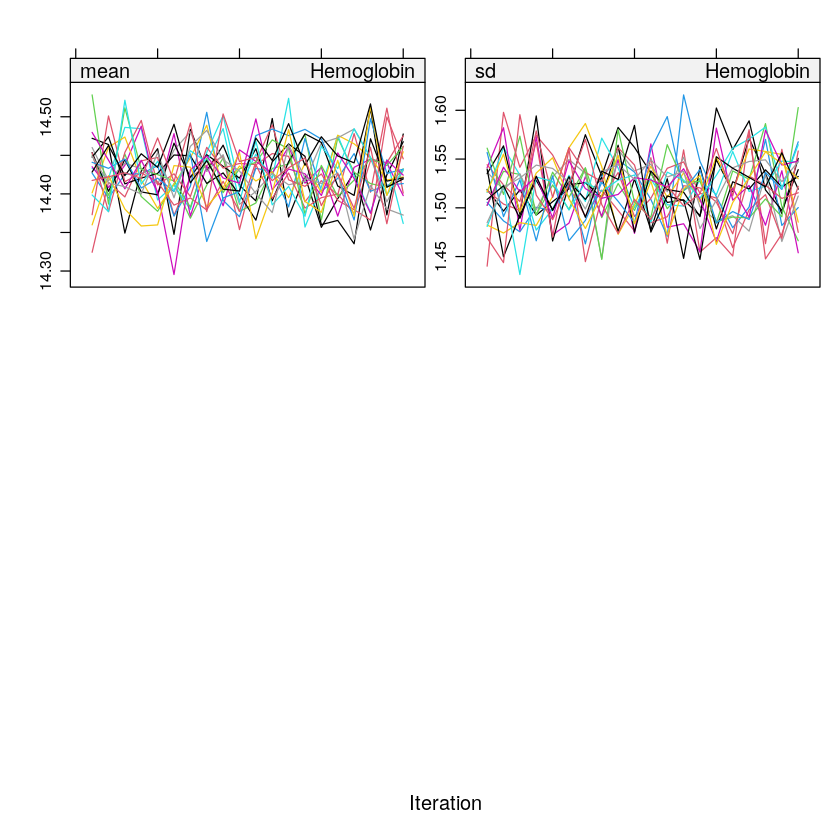

In [31]:
plot(default_mi_results)

In [33]:
names(NHANES)

[1] "Cancer.Incidence" "Cancer.Death"     "Age"              "Smoke"           
 [5] "Ed"               "Race"             "Weight"           "BMI"             
 [9] "Diet.Iron"        "Albumin"          "Serum.Iron"       "TIBC"            
[13] "Transferin"       "Hemoglobin"       "Sex"

Now we fit a linear regression model to the imputed data

In [40]:
library(pscl)

Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis



In [38]:
cancer_incidence_fit = with(default_mi_results, glm(
    Cancer.Incidence ~ Age + Smoke + Ed + Race + Weight + BMI + Diet.Iron +
    Albumin + Serum.Iron + TIBC + Transferin + Hemoglobin + Sex,
    family='binomial'
))
summary(pool(cancer_incidence_fit))

term,estimate,std.error,statistic,df,p.value
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-4.1676539253,0.937448357,-4.4457424,3460.16338,9.033885e-06
Age,0.0533334513,0.003307131,16.1268043,5372.81084,0.000000e+00
SmokePast,-0.1600830086,0.123839950,-1.2926605,9516.19478,1.961599e-01
SmokeNonsmoker,-0.1863474554,0.100426361,-1.8555632,8514.07038,6.355038e-02
SmokeUnknown,0.0373271351,0.124088658,0.3008102,9522.41229,7.635658e-01
Ed,-0.1460257275,0.105312739,-1.3865913,8813.77788,1.656015e-01
Race,0.0765799992,0.108571788,0.7053398,9282.35958,4.806165e-01
Weight,0.0237221319,0.008058479,2.9437482,122.68051,3.879383e-03
BMI,-0.0785700766,0.028429911,-2.7636413,96.36798,6.848227e-03


In [47]:
pscl::pR2(pool(cancer_incidence_fit))['McFadden']

ERROR: Error in UseMethod("logLik"): no applicable method for 'logLik' applied to an object of class "c('mipo', 'data.frame')"


In [48]:
library(caret)

Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘caret’


The following object is masked from ‘package:survival’:

    cluster




In [49]:
caret::varImp(pool(cancer_incidence_fit))

ERROR: Error in UseMethod("varImp"): no applicable method for 'varImp' applied to an object of class "c('mipo', 'data.frame')"


In [39]:
cancer_death_fit = with(default_mi_results, glm(
    Cancer.Death ~ Age + Smoke + Ed + Race + Weight + BMI + Diet.Iron +
    Albumin + Serum.Iron + TIBC + Transferin + Hemoglobin + Sex,
    family='binomial'
))
summary(pool(cancer_death_fit))

term,estimate,std.error,statistic,df,p.value
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-5.183046036,1.227364766,-4.2229060,1794.4665,2.532493e-05
Age,0.059634557,0.004560819,13.0754054,7079.0862,0.000000e+00
SmokePast,-0.446154526,0.168962679,-2.6405507,9543.1087,8.290616e-03
SmokeNonsmoker,-0.291542046,0.131658003,-2.2143891,9183.4249,2.682649e-02
SmokeUnknown,0.293016644,0.147180907,1.9908604,9545.2075,4.652470e-02
Ed,-0.142373706,0.141331694,-1.0073728,9181.1909,3.137822e-01
Race,-0.109055754,0.133366762,-0.8177131,9470.0775,4.135416e-01
Weight,0.009890370,0.010220103,0.9677368,147.9931,3.347547e-01
BMI,-0.036162651,0.035596352,-1.0159089,114.8214,3.118087e-01
